In [8]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from astropy.io import fits as fits
from astropy.table import Table
from astropy import constants as const
from astropy import units as u
from astropy.table import QTable

import healpy as hp
import math

import sys
sys.path.append('/global/homes/l/lbigwood/LSS/py')
import LSS
import LSS.SV3
import LSS.SV3.cattools as cattools

from desitarget.sv3.sv3_targetmask import desi_mask, bgs_mask, mws_mask
from desitarget.geomask import get_imaging_maskbits 

nside = 32
orig_density_per_deg = 2500

In [26]:
#number of pixels on sphere and pixel area
npix = hp.nside2npix(nside)
pixel_area = hp.nside2pixarea(nside,degrees=True)

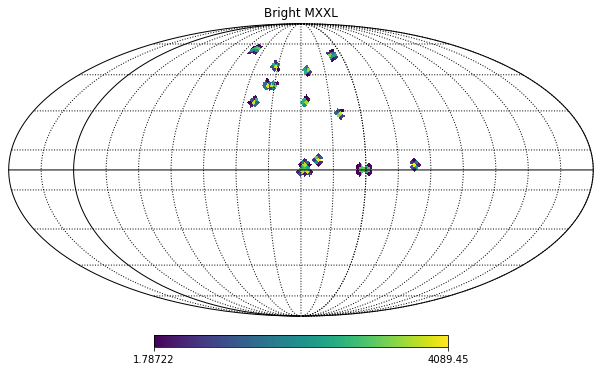

In [34]:
f = fits.open('/global/cscratch1/sd/mjwilson/desi/BGS/lumfn/MXXL/bright_v0.4.fits')
mxxl=f[1].data

# bright_mxxl = Table(mxxl[(mxxl['RMAG_DRED'])<= 19.5])
# faint_mxxl = Table(mxxl[(mxxl['RMAG_DRED'])> 19.5])

#indices of pixels with non-zero density, unorganised list.
all_pixel_indices = hp.ang2pix(nside, mxxl['RA'].data, mxxl['DEC'].data,nest=True, lonlat=True)

#indice of filled pixels and corrosponding targets in pixel
filled_pixel_index, filled_targets_per_pixel = np.unique(all_pixel_indices, return_counts=True) 

#no. targets per pixel, initially 0 
targets_per_pixel = np.zeros(hp.nside2npix(nside))

#update no. targets per pixel 
targets_per_pixel[filled_pixel_index] = filled_targets_per_pixel/pixel_area
targets_per_pixel[targets_per_pixel == 0] = np.NaN 

#mollview map of pixels
hp.mollview(targets_per_pixel,nest=True,rot=(220, 0.0, 0.0), badcolor='white',title='Bright MXXL')
hp.graticule(dpar=5, dmer=5) 

In [35]:
#add on 20\% of faints 
single_mask = (all_pixel_indices==2286)
single_pixel_mxxl = mxxl[single_mask]

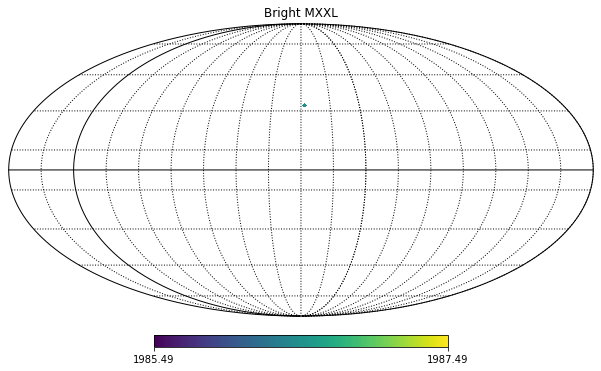

In [36]:
#indices of pixels with non-zero density, unorganised list.
all_pixel_indices = hp.ang2pix(nside, single_pixel_mxxl['RA'].data,single_pixel_mxxl['DEC'].data,nest=True, lonlat=True)

#indice of filled pixels and corrosponding targets in pixel
filled_pixel_index, filled_targets_per_pixel = np.unique(all_pixel_indices, return_counts=True) 

#no. targets per pixel, initially 0 
targets_per_pixel = np.zeros(hp.nside2npix(nside))

#update no. targets per pixel 
targets_per_pixel[filled_pixel_index] = filled_targets_per_pixel/pixel_area
targets_per_pixel[targets_per_pixel == 0] = np.NaN 

#mollview map of pixels
hp.mollview(targets_per_pixel,nest=True,rot=(220, 0.0, 0.0), badcolor='white',title='Bright MXXL')
hp.graticule(dpar=5, dmer=5) 

In [41]:
single_pixel_mxxl = Table(single_pixel_mxxl)

In [42]:
single_pixel_mxxl['BGS_BRIGHT'] = single_pixel_mxxl['RMAG_DRED'] <= 19.5

In [45]:
type(single_pixel_bright_mxxl)

astropy.io.fits.fitsrec.FITS_rec

In [46]:
single_pixel_mxxl['SUBPRIORITY'] = np.random.uniform(0, 1, len(single_pixel_mxxl))

In [52]:
for x in ['PARALLAX', 'PMRA', 'PMDEC', 'REF_EPOCH']:
    single_pixel_mxxl[x] = 0.0

In [50]:
for x in ['DESITARGET', 'BGS_TARGET']:
    single_pixel_mxxl['DESI_TARGET'] = -99

In [ ]:
is_bright =  single_pixel_mxxl['BGS_BRIGHT'] == True

single_pixel_mxxl['DESI_TARGET'][is_bright] = 1152921504606846976

In [51]:
is_faint =  single_pixel_mxxl['BGS_BRIGHT'] == False

# single_pixel_mxxl['DESI_TARGET'][is_bright] = 

In [ ]:
draws    = np.random.uniform(0, 1, len(single_pixel_mxxl))

is_hip   = (draws > 0.8) & is_faint

single_pixel_mxxl['PRIORITY_INIT'][is_hip] = 102000
single_pixel_mxxl['PRIORITY'][is_hip] = 102000

In [49]:
single_pixel_mxxl

MOCKRA,MOCKDEC,Z,ZOBS,MRH,RMAG_DRED,REFGMR0P1,GTYPE,HMASS,NMOCK,RA,DEC,TARGETID,BGS_BRIGHT,SUBPRIORITY,PARALLAX,PMRA,PMDEC,REF_EPOCH
float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,int64,bool,float64,float64,float64,float64,float64
161.65171813964844,33.268436431884766,0.07316961884498596,0.07462241500616074,-19.675804138183594,17.03407859802246,0.5126975178718567,0.0,48.36236572265625,3,217.7341398481513,33.35300965858068,15201,True,0.6864061129135283,0.0,0.0,0.0,0.0
161.55142211914062,32.71393585205078,0.2935197055339813,0.2911304533481598,-21.02385711669922,19.17359161376953,0.6787194609642029,0.0,427.1332702636719,3,217.9704740595073,32.828278153387444,15211,True,0.9499668843159778,0.0,0.0,0.0,0.0
162.49090576171875,33.18569564819336,0.05369802936911583,0.05237646400928497,-19.27415657043457,16.71084976196289,0.5662139654159546,0.0,37.85028839111328,3,218.5161234058684,33.62560878645456,15260,True,0.36398719743080676,0.0,0.0,0.0,0.0
151.8583984375,33.0943717956543,0.31909045577049255,0.3193274438381195,-21.376022338867188,19.01789093017578,0.6118157505989075,0.0,106.78179168701172,4,218.0167053419407,33.2861591244983,15269,True,0.71883218938833,0.0,0.0,0.0,0.0
161.90489196777344,32.63985061645508,0.3393903076648712,0.33908751606941223,-21.143402099609375,19.404537200927734,0.5818796753883362,0.0,267.03582763671875,3,218.3227086368473,32.90880158153905,15362,True,0.7818572125868606,0.0,0.0,0.0,0.0
162.40890502929688,33.75093078613281,0.2521383762359619,0.2529202401638031,-20.42389678955078,19.325252532958984,0.5965592861175537,0.0,100.47611999511719,3,218.10916444689556,34.083816462583,15373,True,0.21441647866398017,0.0,0.0,0.0,0.0
161.42324829101562,33.3052864074707,0.045033182948827744,0.043150462210178375,-19.45867347717285,16.108394622802734,0.7103195786476135,0.0,47.69460678100586,3,217.51335130976537,33.29139027066707,15427,True,0.201569363318724,0.0,0.0,0.0,0.0
151.95376586914062,32.59006118774414,0.23276275396347046,0.23004817962646484,-20.613527297973633,19.023496627807617,0.8957391381263733,0.0,99.20861053466797,4,218.39443713356403,32.8854249547859,15587,True,0.6407918272116527,0.0,0.0,0.0,0.0
161.2725372314453,33.21630096435547,0.13150277733802795,0.13281036913394928,-19.14921760559082,18.95392608642578,0.5186614990234375,0.0,28.24403953552246,3,217.43423432681485,33.152036823030194,15627,True,0.911475289484452,0.0,0.0,0.0,0.0


In [47]:
#Working through a list of healpix.

In [25]:
mtldatamodel = np.array([], dtype=[ 

    ('RA', '>f8'), ('DEC', '>f8'), ('PARALLAX', '>f4'), 

    ('PMRA', '>f4'), ('PMDEC', '>f4'), ('REF_EPOCH', '>f4'), 

    ('DESI_TARGET', '>i8'), ('BGS_TARGET', '>i8'), ('MWS_TARGET', '>i8'), 

    ('SCND_TARGET', '>i8'), ('TARGETID', '>i8'), 

    ('SUBPRIORITY', '>f8'), ('OBSCONDITIONS', 'i4'), 

    ('PRIORITY_INIT', '>i8'), ('NUMOBS_INIT', '>i8'), ('PRIORITY', '>i8'), 

    ('NUMOBS', '>i8'), ('NUMOBS_MORE', '>i8'), ('Z', '>f8'), ('ZWARN', '>i8'), 

    ('TIMESTAMP', 'U25'), ('VERSION', 'U14'), ('TARGET_STATE', 'U30'), 

    ('ZTILEID', '>i4') 

    ]) 

 
t = Table(mtldatamodel) 

# Entries correspond to the datamodel above.  
# RA and DEC are first two entries, need replaced by the mock value.  
# TARGETID needs to start at 0 and increment by 1 with every add row.  
# SUBPRIORITY is a column with values equivalent to np.uniform(0, 1, len(mxxl_healpixel)) 
# PRIORITY_INIT = 102100 for BGS BRIGHT, 102000 FOR BGS FAINT.  
# PRIORITY = PRIORITY_INIT  

prev_maxtid=0 

for i, row in enumerate(single_pixel_bright_mxxl):
    t.add_row((row['RA'],\
               row['DEC'],\
               row['PARALLAX'],\ # PARALLAX
               row['PMRA'],\ # PMRA
               row['PMDEC'],\ # PMDEC
               row['REF_EPOCH'],\ # REF_EPOCH
               1152921504606846976,\ # DESI_TARGET
               512,\ # BGS_TARGET
               0,\ # MWS_TARGET  
               0,\ # SCND_TARGET
               prev_maxtid + i,\ # TARGETID
               row['SUBPRIORITY'],\ # SUBPRIORITY
               516,\ # OBSCONDITIONS
               102100,\ # PRIORITY_INIT
               9,\ # NUMOBS_INIT
               102100,\ # PRIORITY
               0,\ # NUMOBS 
               9,\ # NUMOBS_MORE 
               -1.0,\ # Z
               -1,\ # ZWARN
               '2021-04-04T23:05:09',\ # TIMESTAMP
               '0.57.0',\ #VERSION
               'BGS|UNOBS',\ # TARGET_STATE
               -1)) # ZTILEID

t.meta['AUTHOR']  = 'Leah Bigwood' 
t.meta['Mock']    = True 
t.meta['MAX_TID'] = t['TARGETID'].data.max()

#create these directories - change !
t.write('/global/cscratch1/sd/lbigwood/S4MOCK/mockledger/sv3/bright/sv3mtl-bright-hp-2286.ecsv' , format='ascii.ecsv', overwrite=True) 

SyntaxError: unexpected character after line continuation character (<ipython-input-25-45168b61ca3d>, line 38)